# Functions from Wikipedia for Euler Maruyama

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
import pynamical

# Parámetros fijos del sistema
a = 1.0
c = 0.1
I2 = 0.5
I3 = 0.2

# Definición del sistema de EDOs (modelo continuo)
def decision_ode(state, t, I1):
    x, y = state
    dx_dt = (a/2)*(I1 - I2) + x*y - c*(x**2 + 3*y**2)*x
    dy_dt = (a/6)*(I1 + I2 - 2*I3) + (x**2 - 3*y**2)/6 - c*(x**2 + 3*y**2)*y
    return [dx_dt, dy_dt]

# Rango del parámetro I₁ que se variará para la bifurcación
I1_min = 0.0
I1_max = 2.0
num_I1 = 500
I1_values = np.linspace(I1_min, I1_max, num_I1)

# Definición del vector de tiempo para la simulación continua
t = np.linspace(0, 50, 5000)  # tiempo de simulación de 0 a 50 (con 5000 puntos)

# Número de puntos que se descartan (fase transitoria)
num_discard = 500

# Lista para almacenar los valores asintóticos de x para cada I₁
x_bif = []

# Condición inicial para [x, y]
initial_state = [0.1, 0.1]

# Para cada valor de I₁, integramos el sistema y guardamos los valores de x después de la transitoria
for I1 in I1_values:
    sol = odeint(decision_ode, initial_state, t, args=(I1,))
    # Se toma la parte final del tiempo (después de descartar los transitorios)
    x_values = sol[num_discard:, 0]
    x_bif.append(x_values)

# Convertir la lista a un array y luego a DataFrame
# Cada columna corresponderá a un valor de I₁
df_bif = pd.DataFrame(np.array(x_bif).T, columns=I1_values)

# Graficar el diagrama de bifurcación usando pynamical
pynamical.bifurcation_plot(df_bif, 
                           title='Diagrama de Bifurcación (sistema continuo)', 
                           xmin=I1_min, xmax=I1_max, 
                           ymin=-2, ymax=2, 
                           save=False)
plt.xlabel('I₁')
plt.ylabel('x (valor asintótico)')
plt.show()


ModuleNotFoundError: No module named 'pynamical'

Puntos de equilibrio encontrados:
solution:[ 1.53988700e-20 -3.33333333e-01], f(solution):-3.849717494167889e-21, g(solution):0.0
solution:[-1.58432533e-106  3.40730463e-106], f(solution):-2.699139517626447e-212, g(solution):-1.0328678099981134e-212
solution:[-0.25        0.16666667], f(solution):0.0, g(solution):-1.734723475976807e-18
solution:[0.25       0.16666667], f(solution):3.469446951953614e-18, g(solution):8.673617379884035e-19


/var/folders/gk/r166p6nx2bb5zf2rlwww8fc00000gn/T/ipykernel_36769/1748339485.py:44: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  sol = fsolve(F, guess, xtol=14e-14)


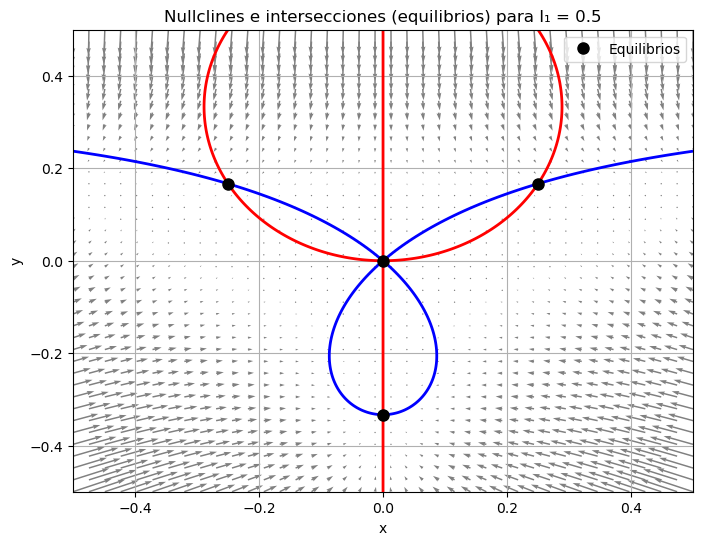

Distancia de los puntos de equilibrio al centro: 0.3333333333333333, 3.757633774283056e-106, 0.3004626062886658, 0.3004626062886657


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parámetros del sistema
a = 2.0
c = 0.1
I1 = 0.5  # Valor fijo para I₁ (puedes modificarlo)
I2 = 0.5
I3 = 0.5
s = 1
R = 1/4
c = 1
x0 = s*R -c*R + I1
phi_2 = 2
a = 2*x0
# Definición de las funciones (ẋ y ẏ)
def f(state):
    x, y = state
    y = 1/2*y
    # ẋ = (a/2)*(I₁ − I₂) + x*y − c*(x² + 3*y²)*x
    return (a/2)*(I1 - I2) + x*y - c*(x**2 + 3*y**2)*x

def g(state):
    x, y = state
    y = 1/2*y
    # ẏ = (a/6)*(I₁ + I₂ − 2*I₃) + (x² − 3*y²)/6 − c*(x² + 3*y²)*y
    return (a/6)*(I1 + I2 - 2*I3) + (x**2 - 3*y**2)/6 - c*(x**2 + 3*y**2)*y

# Sistema de ecuaciones
def F(state):
    return [f(state), g(state)]

# Se realizan múltiples intentos de solución a partir de distintos valores iniciales para asegurar encontrar todos los equilibrios
guesses = []
x_vals = np.linspace(-4, 4, 20)
y_vals = np.linspace(-4, 4, 20)
for x0 in x_vals:
    for y0 in y_vals:
        guesses.append([x0, y0])

solutions = []
for guess in guesses:
    sol = fsolve(F, guess, xtol=14e-14)
    # Solo se agrega la solución si no está ya incluida (dentro de tolerancia)
    if not any(np.allclose(sol, s, atol=1e-2) for s in solutions):
        solutions.append(sol)

solutions = np.array(solutions)
print('Puntos de equilibrio encontrados:')
for solution in solutions:
    print(f'solution:{solution}, f(solution):{f(solution)}, g(solution):{g(solution)}')
# Construcción de la malla para dibujar las nullclines
x_grid = np.linspace(-0.5, 0.5, 400)
y_grid = np.linspace(-0.5, 0.5, 400)
X, Y = np.meshgrid(x_grid, y_grid)

x_grid2 = np.linspace(-0.5, 0.5, 40)
y_grid2 = np.linspace(-0.5, 0.5, 40)
X2, Y2 = np.meshgrid(x_grid2, y_grid2)
U = (a/2)*(I1 - I2) + (s**2)*phi_2*X2*Y2 - c*(X2**2 + 3*Y2**2)*X2
V = (a/6)*(I1 + I2 - 2*I3) + (s**2)*phi_2*(X2**2 - 3*Y2**2)/6 - c*(X2**2 + 3*Y2**2)*Y2

F_vals = (a/2)*(I1 - I2) + X*Y - c*(X**2 + 3*Y**2)*X
G_vals = (a/6)*(I1 + I2 - 2*I3) + (X**2 - 3*Y**2)/6 - c*(X**2 + 3*Y**2)*Y

# Dibujo de las nullclines y los puntos de equilibrio (intersecciones)
plt.figure(figsize=(8,6))
plt.quiver(X2, Y2, U, V, color='gray', alpha=1)
nc1 = plt.contour(X, Y*2, F_vals, levels=[0], colors='red', linewidths=2)
nc2 = plt.contour(X, Y*2, G_vals, levels=[0], colors='blue', linewidths=2)
plt.plot(solutions[:,0], solutions[:,1], 'ko', markersize=8, label='Equilibrios')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.title('Nullclines e intersecciones (equilibrios) para I₁ = {}'.format(I1))
plt.legend()
plt.grid(True)
plt.show()

print(f'Distancia de los puntos de equilibrio al centro: {np.linalg.norm(solutions[0])}, {np.linalg.norm(solutions[1])}, {np.linalg.norm(solutions[2])}, {np.linalg.norm(solutions[3])}')


/var/folders/gk/r166p6nx2bb5zf2rlwww8fc00000gn/T/ipykernel_36769/2262498277.py:39: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  sol = fsolve(F, guess)


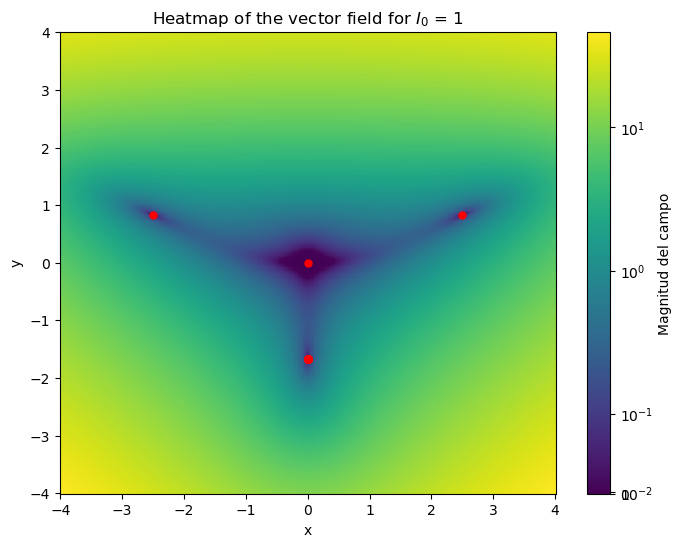

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.colors import LogNorm
import matplotlib.colors as colors

# Parámetros del sistema
a = 1
c = 0.1
I1 = 1  # Valor fijo para I₁ (puedes modificarlo)
I2 = 1
I3 = 1

# Definición de las funciones (ẋ y ẏ)
def f(state):
    x, y = state
    # ẋ = (a/2)*(I₁ − I₂) + x*y − c*(x² + 3*y²)*x
    return (a/2)*(I1 - I2) + x*y - c*(x**2 + 3*y**2)*x

def g(state):
    x, y = state
    # ẏ = (a/6)*(I₁ + I₂ − 2*I₃) + (x² − 3*y²)/6 − c*(x² + 3*y²)*y
    return (a/6)*(I1 + I2 - 2*I3) + (x**2 - 3*y**2)/6 - c*(x**2 + 3*y**2)*y

# Sistema de ecuaciones
def F(state):
    return [f(state), g(state)]

# Se realizan múltiples intentos de solución a partir de distintos valores iniciales para asegurar encontrar todos los equilibrios
guesses = []
x_vals = np.linspace(-4, 4, 20)
y_vals = np.linspace(-4, 4, 20)
for x0 in x_vals:
    for y0 in y_vals:
        guesses.append([x0, y0])

solutions = []
for guess in guesses:
    sol = fsolve(F, guess)
    # Solo se agrega la solución si no está ya incluida (dentro de tolerancia)
    if not any(np.allclose(sol, s, atol=1e-12) for s in solutions):
        solutions.append(sol)

solutions = np.array(solutions)

# Construcción de la malla para dibujar las nullclines
x_grid = np.linspace(-4, 4, 400)
y_grid = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_grid, y_grid)

U = (a/2)*(I1 - I2) + X*Y - c*(X**2 + 3*Y**2)*X
V = (a/6)*(I1 + I2 - 2*I3) + (X**2 - 3*Y**2)/6 - c*(X**2 + 3*Y**2)*Y

F_vals = (a/2)*(I1 - I2) + X*Y - c*(X**2 + 3*Y**2)*X
G_vals = (a/6)*(I1 + I2 - 2*I3) + (X**2 - 3*Y**2)/6 - c*(X**2 + 3*Y**2)*Y

speed = np.sqrt(U**2 + V**2)
plt.figure(figsize=(8, 6))
heatmap = plt.pcolormesh(X, Y, speed, shading='auto', cmap='viridis',norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=speed.max()))
plt.colorbar(heatmap, label='Magnitud del campo')
plt.plot(solutions[:,0], solutions[:,1], 'ro', markersize=5, label='Equilibrios')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Heatmap of the vector field for $I_0$ = {I1}')
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0
c = 1.0
I1, I2, I3 = 1.0, 1.0, 1.0
T = 10.0  # Total time
dt = 0.01  # Time step
N = int(T / dt)  # Number of steps

def a(s, c, phi):
    return s - c * phi
def c(s, c, phi):
    return s + c * phi

# Noise terms
xi1 = np.random.normal(0, 1, N)
xi2 = np.random.normal(0, 1, N)
xi3 = np.random.normal(0, 1, N)

x = np.zeros(N)
y = np.zeros(N)

x[0] = 0.0
y[0] = 0.0

def EulerMaruyama(a, c, I1, I2, I3, dt, N, xi1, xi2, xi3):
    for i in range(1, N):
        dx = (-1/2 * (I1 - I2) + x[i-1] * y[i-1] - c * (x[i-1]**2 + 3 * y[i-1]**2) * x[i-1] + a * (xi1[i-1] - xi2[i-1]) / 2) * dt
        dy = (-1/6 * (I1 + I2 - 2 * I3) + (x[i-1]**2 - 3 * y[i-1]**2) / 6 - c * (x[i-1]**2 + 3 * y[i-1]**2) * y[i-1] + a * (xi1[i-1] + xi2[i-1] - 2 * xi3[i-1]) / 6) * dt
        x[i] = x[i-1] + dx
        y[i] = y[i-1] + dy
    return x,y 

plt.plot(EulerMaruyama(a, c, I1, I2, I3, dt, N, xi1, xi2, xi3)[0], EulerMaruyama(a, c, I1, I2, I3, dt, N, xi1, xi2, xi3)[1])
plt.plot(x[0], y[0], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler-Maruyama Simulation')
plt.show()

TypeError: unsupported operand type(s) for *: 'function' and 'float'

In [1]:
plot_simulations(10)

NameError: name 'plot_simulations' is not defined

Puntos de equilibrio encontrados:
solution:[ 1.53988700e-20 -3.33333333e-01], f(solution):-3.849717494167889e-21, g(solution):0.0
solution:[-1.58432533e-106  3.40730463e-106], f(solution):-2.699139517626447e-212, g(solution):-1.0328678099981134e-212
solution:[-0.25        0.16666667], f(solution):0.0, g(solution):-1.734723475976807e-18
solution:[0.25       0.16666667], f(solution):3.469446951953614e-18, g(solution):8.673617379884035e-19


/var/folders/gk/r166p6nx2bb5zf2rlwww8fc00000gn/T/ipykernel_36769/1748339485.py:44: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  sol = fsolve(F, guess, xtol=14e-14)


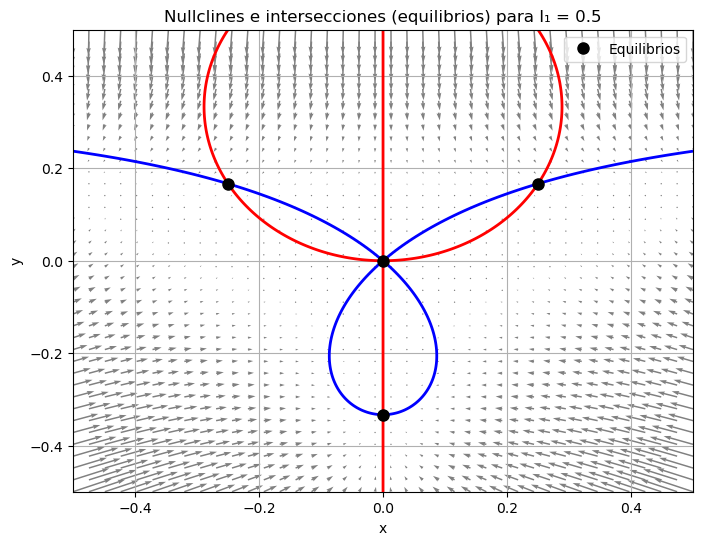

Distancia de los puntos de equilibrio al centro: 0.3333333333333333, 3.757633774283056e-106, 0.3004626062886658, 0.3004626062886657


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parámetros del sistema
a = 2.0
c = 0.1
I1 = 0.5  # Valor fijo para I₁ (puedes modificarlo)
I2 = 0.5
I3 = 0.5
s0 = 1
sL = 1
sC = 1
sR = 1
R = 1/4
R_I = 1/4
I_0 = 1
c = 1
x0 = s0*R -c*R + I0
phi2 = 2
phi1 = 1
# Definición de las funciones (ẋ y ẏ)
def f(state):
    x, y = state
    y = 1/2*y
    # ẋ = (a/2)*(I₁ − I₂) + x*y − c*(x² + 3*y²)*x
    return (phi1/2)*(I1 - I2 + R(sL-sC)) + s0**2*x*y*phi2 - c*(x**2 + 3*y**2)*x

def g(state):
    x, y = state
    y = 1/2*y
    # ẏ = (a/6)*(I₁ + I₂ − 2*I₃) + (x² − 3*y²)/6 − c*(x² + 3*y²)*y
    return (a/6)*(I1 + I2 - 2*I3) + (x**2 - 3*y**2)/6 - c*(x**2 + 3*y**2)*y

# Sistema de ecuaciones
def F(state):
    return [f(state), g(state)]

# Se realizan múltiples intentos de solución a partir de distintos valores iniciales para asegurar encontrar todos los equilibrios
guesses = []
x_vals = np.linspace(-4, 4, 20)
y_vals = np.linspace(-4, 4, 20)
for x0 in x_vals:
    for y0 in y_vals:
        guesses.append([x0, y0])

solutions = []
for guess in guesses:
    sol = fsolve(F, guess, xtol=14e-14)
    # Solo se agrega la solución si no está ya incluida (dentro de tolerancia)
    if not any(np.allclose(sol, s, atol=1e-2) for s in solutions):
        solutions.append(sol)

solutions = np.array(solutions)
print('Puntos de equilibrio encontrados:')
for solution in solutions:
    print(f'solution:{solution}, f(solution):{f(solution)}, g(solution):{g(solution)}')
# Construcción de la malla para dibujar las nullclines
x_grid = np.linspace(-0.5, 0.5, 400)
y_grid = np.linspace(-0.5, 0.5, 400)
X, Y = np.meshgrid(x_grid, y_grid)

x_grid2 = np.linspace(-0.5, 0.5, 40)
y_grid2 = np.linspace(-0.5, 0.5, 40)
X2, Y2 = np.meshgrid(x_grid2, y_grid2)
U = (a/2)*(I1 - I2) + (s**2)*phi_2*X2*Y2 - c*(X2**2 + 3*Y2**2)*X2
V = (a/6)*(I1 + I2 - 2*I3) + (s**2)*phi_2*(X2**2 - 3*Y2**2)/6 - c*(X2**2 + 3*Y2**2)*Y2

F_vals = (a/2)*(I1 - I2) + X*Y - c*(X**2 + 3*Y**2)*X
G_vals = (a/6)*(I1 + I2 - 2*I3) + (X**2 - 3*Y**2)/6 - c*(X**2 + 3*Y**2)*Y

# Dibujo de las nullclines y los puntos de equilibrio (intersecciones)
plt.figure(figsize=(8,6))
plt.quiver(X2, Y2, U, V, color='gray', alpha=1)
nc1 = plt.contour(X, Y*2, F_vals, levels=[0], colors='red', linewidths=2)
nc2 = plt.contour(X, Y*2, G_vals, levels=[0], colors='blue', linewidths=2)
plt.plot(solutions[:,0], solutions[:,1], 'ko', markersize=8, label='Equilibrios')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.title('Nullclines e intersecciones (equilibrios) para I₁ = {}'.format(I1))
plt.legend()
plt.grid(True)
plt.show()

print(f'Distancia de los puntos de equilibrio al centro: {np.linalg.norm(solutions[0])}, {np.linalg.norm(solutions[1])}, {np.linalg.norm(solutions[2])}, {np.linalg.norm(solutions[3])}')
